In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def distance(x,y):
    return np.sqrt(np.sum(np.square(x-y)))


In [12]:
def get_distance_matrix(data):
    n = data.shape[0]
    distance_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
        
            distance_matrix[i,j] = distance(data[i],data[j])
    return distance_matrix

In [13]:
def get_v(data, distance_matrix):
    n = data.shape[0]
    v = np.zeros(n)
    for j in range(n):
        tmp = 0
        for i in range(n):
            tmp2 = 0
            for l in range(n):
                tmp2 += distance_matrix[i,l]
            tmp += distance_matrix[i,j]/tmp2
        v[j] = tmp
    return v

In [14]:
def get_center(data, k, distance_matrix):
    # initialize the distance matrix  
    v = get_v(data, distance_matrix)
    v = np.argsort(v)  # return la listes des index une fois la liste trié ie INPUT: [50,100,75] OUPUT : [0,2,1]
    v = v[:k] # on garde les k premier
    center = [data[i,:] for i in v]
    print(center)
    
    return center


In [15]:
def plot_data(data,labels,centers):
    plt.scatter(data[:,0],data[:,1],c=labels)
    plt.scatter(centers[:,0],centers[:,1],marker='*',s=200,c='k')
    plt.show()

In [16]:
def k_medoids(data,k):
    """
    :param data: numpy array
    :param k: number of clusters
    
    """
    
    distance_points_matrix = get_distance_matrix(data)
    # choose center using v 
    centers = get_center(data, k, distance_points_matrix)
    # initialize the labels
    labels = np.zeros(data.shape[0])
    # initialize the distance matrix
    distance_point_cluster_matrix = np.zeros((data.shape[0],k))
    # initialize the cost
    old_cost = -99
    cost = 0
    #stop condition
    done = True
    nb_it = 0
    while done:
        nb_it += 1
        
    
        # calculate the distance matrix
        for j in range(k):
            distance_point_cluster_matrix[:,j] = np.array([distance(x,centers[j]) for x in data])
        # update the labels
        labels = np.argmin(distance_point_cluster_matrix,axis=1)
        # update the cost
        cost = np.sum(np.min(distance_point_cluster_matrix,axis=1))
        if old_cost == cost:
            done = False
        else:
            old_cost = cost
        # update the centers
        for j in range(k):
            centers[j] = np.mean(data[labels==j],axis=0)
            
    return labels,cost, centers, nb_it

[array([-0.17668338,  0.04390325]), array([-0.17021309, -0.22384641]), array([-0.30405298, -0.12620419])]


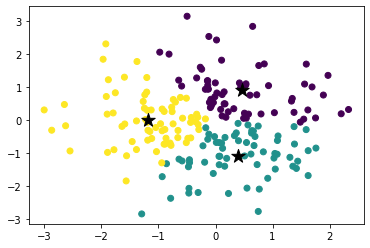

Convergence en 8 itérations 


In [17]:
data = np.random.randn(200,2)
k=3
labels,cost, centers, nb_it = k_medoids(data,k)
centers = np.array([np.mean(data[labels==i],axis=0) for i in range(k)])

plot_data(data,labels,centers)
print(f'Convergence en {nb_it} itérations ')